# Modelling of noise

Two noise sources are modeled:
- Gaussian noise (baseline+dark noise), which is independent of the photon counts
- Photon shot noise, which is dependent on the photon counts (Poisson distribution)

Mind having a look [here](http://kmdouglass.github.io/posts/modeling-noise-for-image-simulations/), which shows a very similar implementation of a noise model.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import synpivimage

Let's first take an image without a particle. This can be done by placing a particle outside of the sensor FOV:

In [2]:
no_particles = synpivimage.Particles(
    x=-100,
    y=-100,
    z=0,
    size=2
)

laser = synpivimage.Laser(shape_factor=10**3, width=1)

## Settings

The noise is controlled via the camera object (`baseline`, `dark_noise` and `shot_noise`). The "randomness" can be controlled via `seed` (to reproduce results, seed=None produces random results)

## Gauss noise

### No noise ($\mu$=0/$\sigma$=0)

In [3]:
cam = synpivimage.Camera(
    nx=128,
    ny=128,
    bit_depth=16,
    qe=1,
    sensitivity=1,
    baseline_noise=0,
    dark_noise=0,
    shot_noise=False,
    fill_ratio_x=1.0,
    fill_ratio_y=1.0,
    particle_image_diameter=2,
    seed=10
)

Text(0.5, 1.0, '$\\mu$= 0.0, $\\sigma$=0.0')

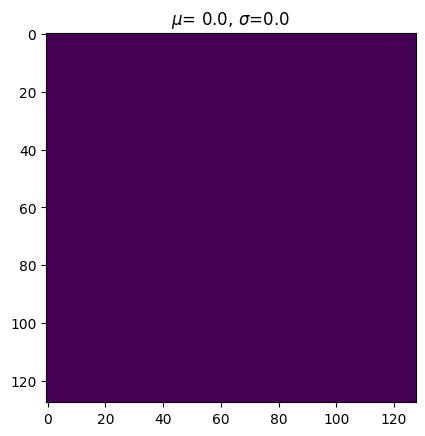

In [4]:
img, _ = synpivimage.take_image(particles=no_particles,
                        camera=cam, laser=laser,
                        particle_peak_count=1000)
plt.imshow(img)
plt.title(f"$\mu$= {cam.baseline_noise}, $\sigma$={cam.dark_noise}")

### Noise $\mu$=50/$\sigma$=10

cam = synpivimage.Camera(
    nx=128,
    ny=128,
    bit_depth=16,
    qe=1,
    sensitivity=1,
    baseline_noise=50,
    dark_noise=10,
    shot_noise=False,
    fill_ratio_x=1.0,
    fill_ratio_y=1.0,
    particle_image_diameter=2
)

Text(0.5, 1.0, '$\\mu$= 50, $\\sigma$=10')

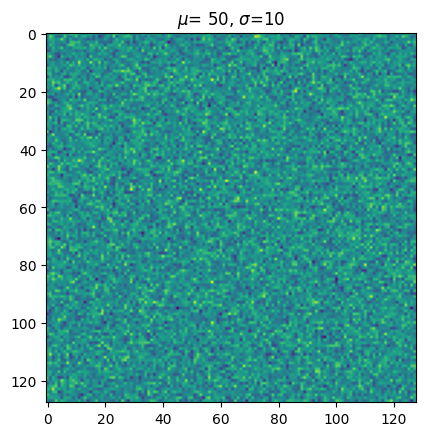

In [5]:
cam.baseline_noise = 50
cam.dark_noise = 10

img, _ = synpivimage.take_image(particles=no_particles,
                        camera=cam, laser=laser,
                        particle_peak_count=1000)
plt.imshow(img)
plt.title(f"$\mu$= {cam.baseline_noise}, $\sigma$={cam.dark_noise}")

### Noise $\mu$=0/$\sigma$=10

In [6]:
cam.baseline_noise = 0
cam.dark_noise = 10

Text(0.5, 1.0, '$\\mu$= 0, $\\sigma$=10')

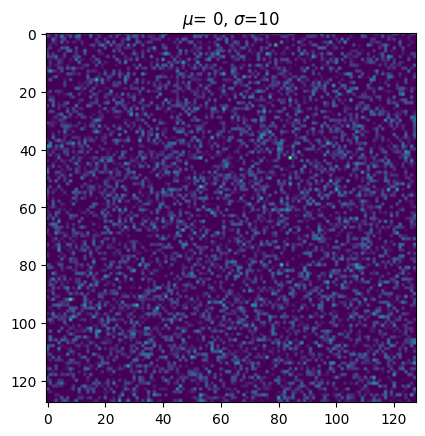

In [7]:
img, _ = synpivimage.take_image(particles=no_particles,
                        camera=cam, laser=laser,
                        particle_peak_count=1000)
plt.imshow(img)
plt.title(f"$\mu$= {cam.baseline_noise}, $\sigma$={cam.dark_noise}")

### Noise $\mu$=10/$\sigma$=0

In [8]:
cam.baseline_noise = 10
cam.dark_noise = 0

Text(0.5, 1.0, '$\\mu$= 10, $\\sigma$=0')

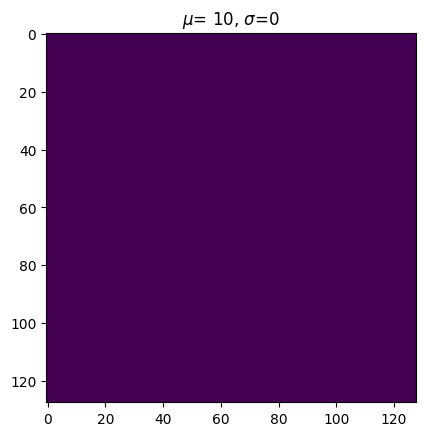

In [9]:
img, _ = synpivimage.take_image(particles=no_particles,
                        camera=cam, laser=laser,
                        particle_peak_count=1000)

plt.imshow(img)
plt.title(f"$\mu$= {cam.baseline_noise}, $\sigma$={cam.dark_noise}")

## Shot Noise

Let's change the camera settings (smaller sensor, 8bit, ...). We illuminate one central particle and investigate the influence of shot noise

In [10]:
cam = synpivimage.Camera(
    nx=8,
    ny=8,
    bit_depth=16,
    qe=1,
    sensitivity=1,
    baseline_noise=10,
    dark_noise=0,
    shot_noise=False,
    fill_ratio_x=1.0,
    fill_ratio_y=1.0,
    particle_image_diameter=2,
    seed=50
)

one_particles = synpivimage.Particles(
    x=4,
    y=4,
    z=0,
    size=2
)

In [11]:
one_particles = laser.illuminate(particles=one_particles)

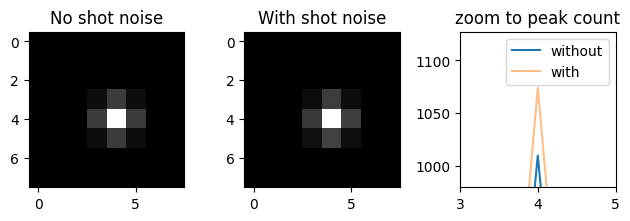

In [12]:
cam.shot_noise = False
img_without_shot_noise, _ = synpivimage.take_image(particles=one_particles,
                                                   laser=laser,
                                                   particle_peak_count=1000,
                                                   camera=cam)

cam.shot_noise = True
img_with_shot_noise, _ = synpivimage.take_image(particles=one_particles,
                                                laser=laser,
                                                particle_peak_count=1000,
                                                camera=cam)

fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].imshow(img_without_shot_noise, cmap='gray', vmax=1000)
axs[0].set_title("No shot noise")
axs[1].imshow(img_with_shot_noise, cmap='gray', vmax=1000)
axs[1].set_title("With shot noise")

axs[2].plot(img_without_shot_noise[4, :], label='without')
axs[2].plot(img_with_shot_noise[4, :], label='with', alpha=0.5)
axs[2].set_xlim(3, 5)
axs[2].set_ylim(980, None)
axs[2].set_title('zoom to peak count')

asp = np.diff(axs[2].get_xlim())[0] / np.diff(axs[2].get_ylim())[0]
axs[2].set_aspect(asp)

plt.legend()